In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('menu.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values if necessary
data = data.dropna()  # Alternatively, use data.fillna() to fill missing values


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [2]:
# Summary statistics
print(data.describe())

# Check for unique values in categorical columns
print(data['Category'].unique())
print(data['Serving Size'].unique())


          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

In [6]:
# Select only numeric columns for mean aggregation
numeric_cols = data.select_dtypes(include='number').columns

# Group by product to see average nutritional values
product_analysis = data.groupby('Item')[numeric_cols].mean()

# Display the product analysis
print(product_analysis)

# Top 10 items by total calories
top_calories = data.groupby('Item')['Calories'].sum().sort_values(ascending=False).head(10)
print(top_calories)

# Top categories by average fat content
top_fat_categories = data.groupby('Category')['Total Fat'].mean().sort_values(ascending=False)
print(top_fat_categories)


                               Calories  Calories from Fat  Total Fat  \
Item                                                                    
1% Low Fat Milk Jug               100.0               20.0        2.5   
Apple Slices                       15.0                0.0        0.0   
Bacon Buffalo Ranch McChicken     430.0              190.0       21.0   
Bacon Cheddar McChicken           480.0              220.0       24.0   
Bacon Clubhouse Burger            720.0              360.0       40.0   
...                                 ...                ...        ...   
Sweet Tea (Medium)                180.0                0.0        0.0   
Sweet Tea (Small)                 150.0                0.0        0.0   
Vanilla Shake (Large)             820.0              210.0       23.0   
Vanilla Shake (Medium)            660.0              170.0       19.0   
Vanilla Shake (Small)             530.0              140.0       15.0   

                               Total Fat (% Daily 

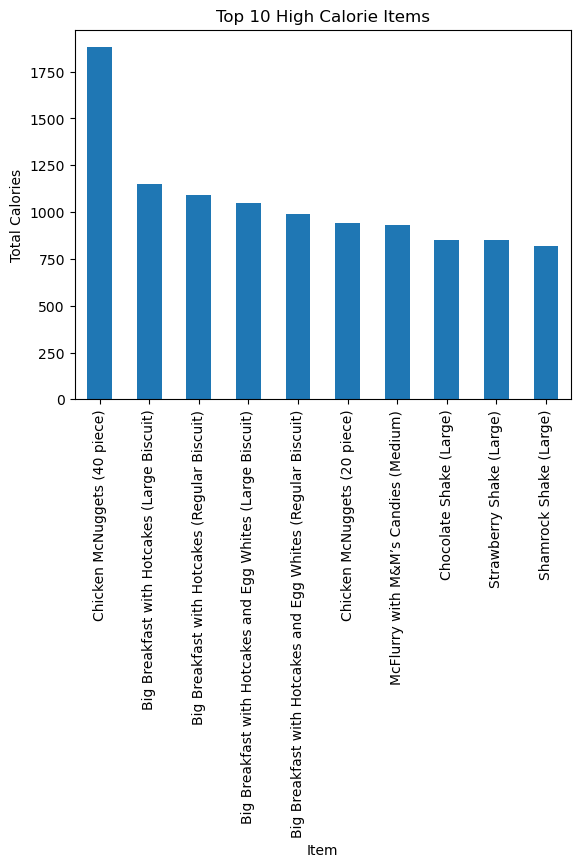

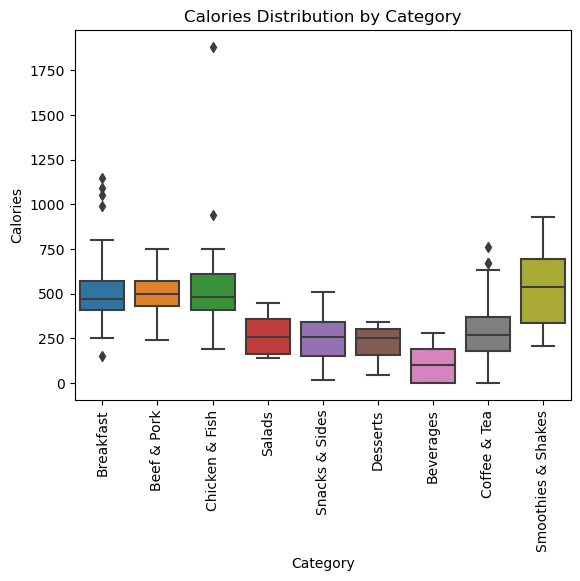

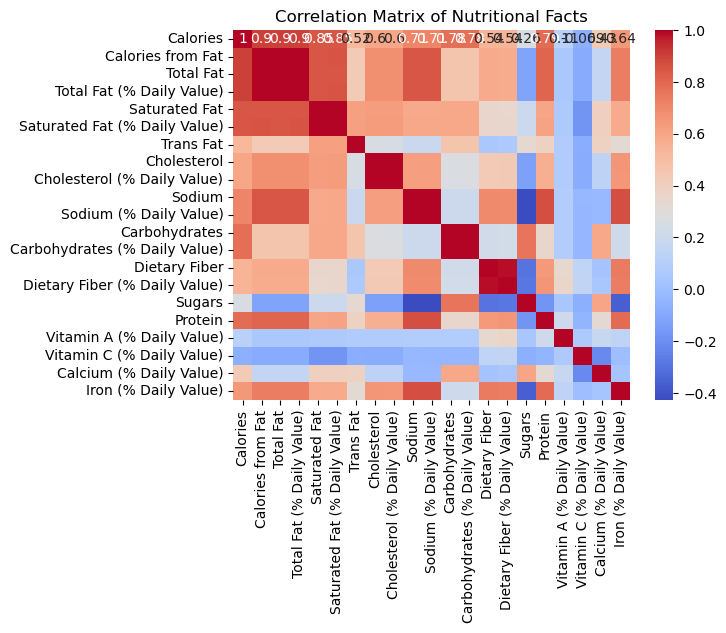

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for top 10 high-calorie items
top_calories.plot(kind='bar', title='Top 10 High Calorie Items')
plt.xlabel('Item')
plt.ylabel('Total Calories')
plt.show()

# Box plot for nutritional values across different categories
sns.boxplot(x='Category', y='Calories', data=data)
plt.title('Calories Distribution by Category')
plt.xticks(rotation=90)
plt.show()

# Heatmap for correlation between different nutritional facts
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nutritional Facts')
plt.show()



## Product Optimization: Identify and promote products with balanced nutritional values to appeal to health-conscious customers.
## Menu Adjustments: Consider reducing or reformulating items high in calories, fat, and sodium to improve overall menu healthiness.
## Customer Education: Provide clear nutritional information and healthier alternatives to guide customer choices.
## Marketing Strategies: Highlight and market products that are both popular and healthier to attract a broader customer base.